In [2]:
"""
Python Code for Project -I
Prediction of Chronic Kidney Disease Using ML Models
"""
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline
##################################################
# Improting the CSV data , visualize some examples and its shape
kidney_data = pd.read_csv('data/kidney_disease.csv')
print(kidney_data.head())
print(kidney_data.shape)

# Removing/Dropping ID column
kidney_data.drop('id', axis = 1, inplace = True)

# Rename the column names to make it more clear and User-friendly
kidney_data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'classification']

# Making sure the changes (column names) made
kidney_data.head()

# Statistical description of the data
kidney_data.describe()

# Identify the data type for each feature/ column
kidney_data.info()

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]
(400, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entrie

In [3]:
# Changing the datatype from object type to numerical data
kidney_data['packed_cell_volume'] = pd.to_numeric(kidney_data['packed_cell_volume'], errors='coerce')
kidney_data['white_blood_cell_count'] = pd.to_numeric(kidney_data['white_blood_cell_count'], errors='coerce')
kidney_data['red_blood_cell_count'] = pd.to_numeric(kidney_data['red_blood_cell_count'], errors='coerce')

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64
coronary_artery_disease
no      362
yes      34
\tno      2
Name: count, dtype: int64
diabetes_mellitus
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64
diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

classification has ['ckd' 'notckd'] values

age has [48.  7. 62. 51. 60. 6

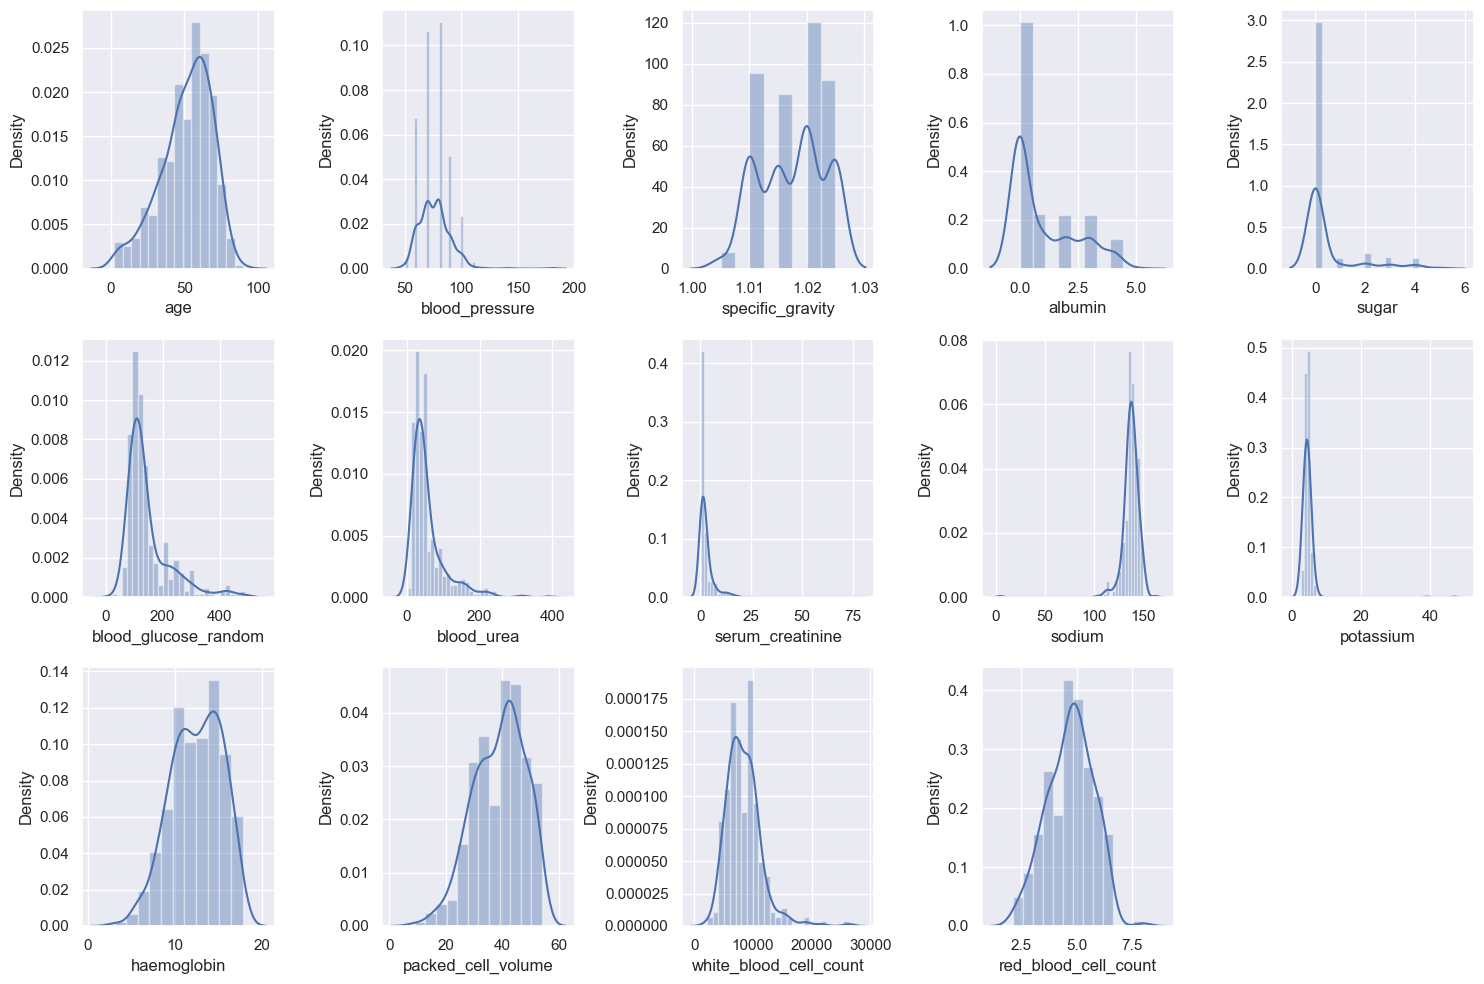

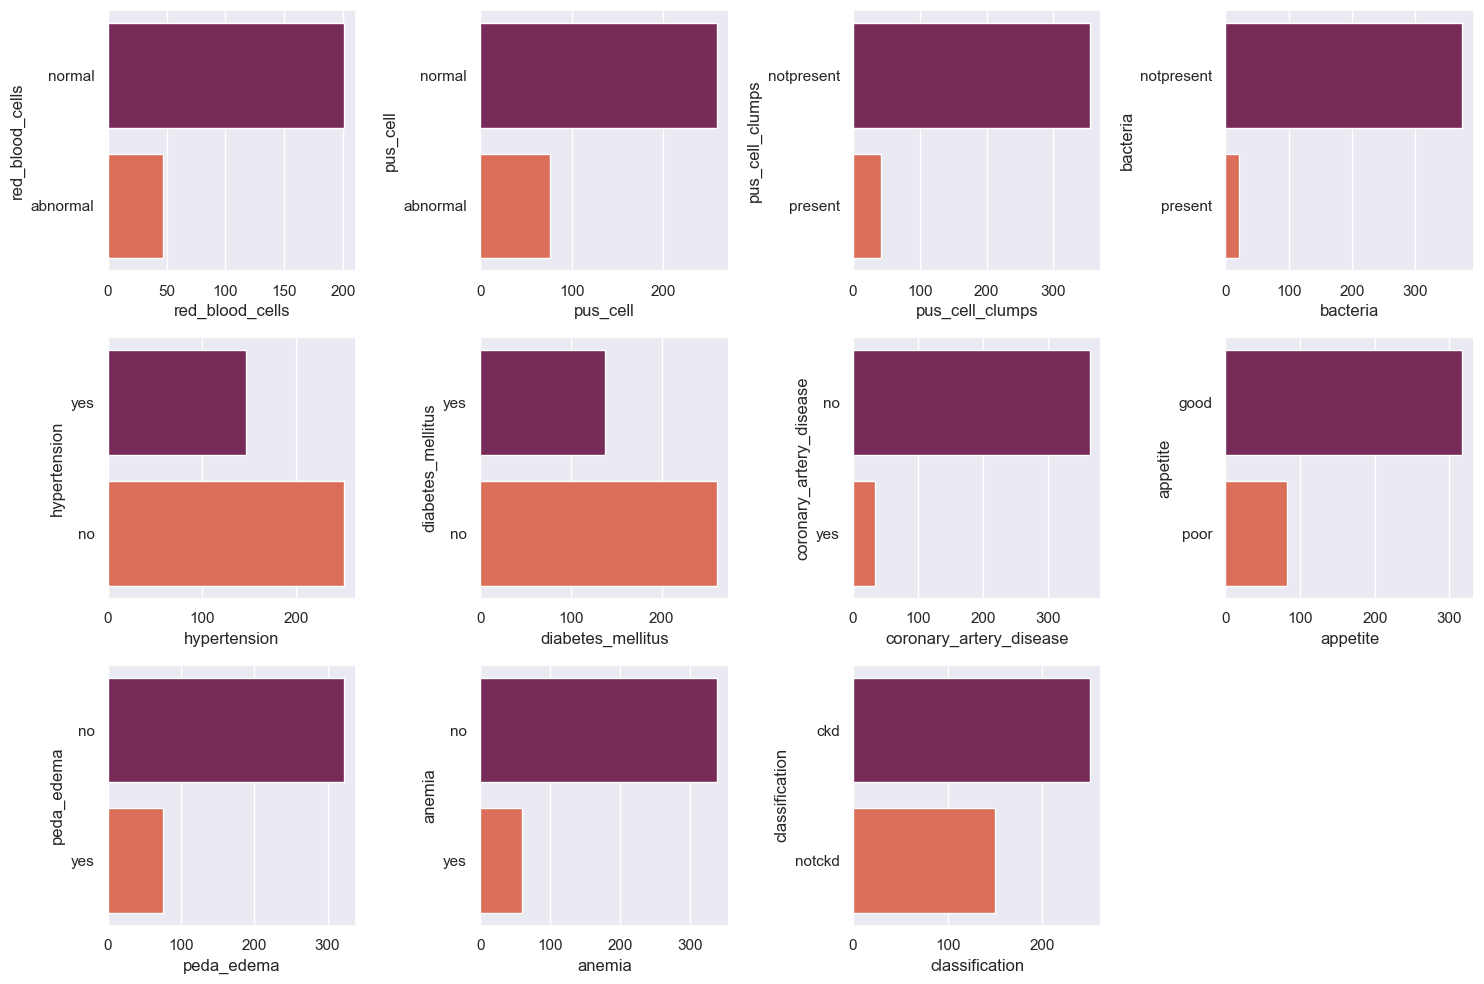

In [4]:
# Extractiong categorical data
object_dtypes = kidney_data.select_dtypes(include = 'object')
object_dtypes.head()

# Extractiong Numerical data
Numerical_dtypes = kidney_data.select_dtypes(include = 'float64')


Numerical_dtypes.head()

# Statistical description of the corrected 14 features numerical data
Numerical_dtypes.describe()

# looking at Unique values (to be corrected) in categorical columns
for col in object_dtypes:
    print(f"{col} has {kidney_data[col].unique()} values\n")

# As the above visualization shows there are three categorical columns with unique values.
# These are separately visualized as:
print(kidney_data.classification.value_counts())
print(kidney_data.coronary_artery_disease.value_counts())
print(kidney_data.diabetes_mellitus .value_counts())

# Cleaning unique values (outliners), Replace incorrect values
kidney_data.classification=kidney_data.classification.replace("ckd\t","ckd")
kidney_data['coronary_artery_disease'] = kidney_data['coronary_artery_disease'].replace(
to_replace = '\tno', value='no')
kidney_data['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'
},inplace=True)

cols = ['diabetes_mellitus', 'coronary_artery_disease', 'classification']
# Making sure replaced correctly
for col in cols:
    print(f"{col} has {kidney_data[col].unique()} values\n")

# looking at Unique values in Numerical data columns
for val in Numerical_dtypes:
    print(f"{val} has {kidney_data[val].unique()} values\n")

# Numerical Features Data Distribution

plt.figure(figsize = (15, 10))
plotnumber = 1

for column in Numerical_dtypes:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(kidney_data[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

# Categorical columns data distribution

plt.figure(figsize = (15, 10))
plotnumber = 1

for column in object_dtypes:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(kidney_data[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

#Labeling Prediction Class
kidney_data['classification'] = kidney_data['classification'].map({'ckd': 0, 'notckd': 1})
kidney_data['classification'] = pd.to_numeric(kidney_data['classification'], errors='coerce')

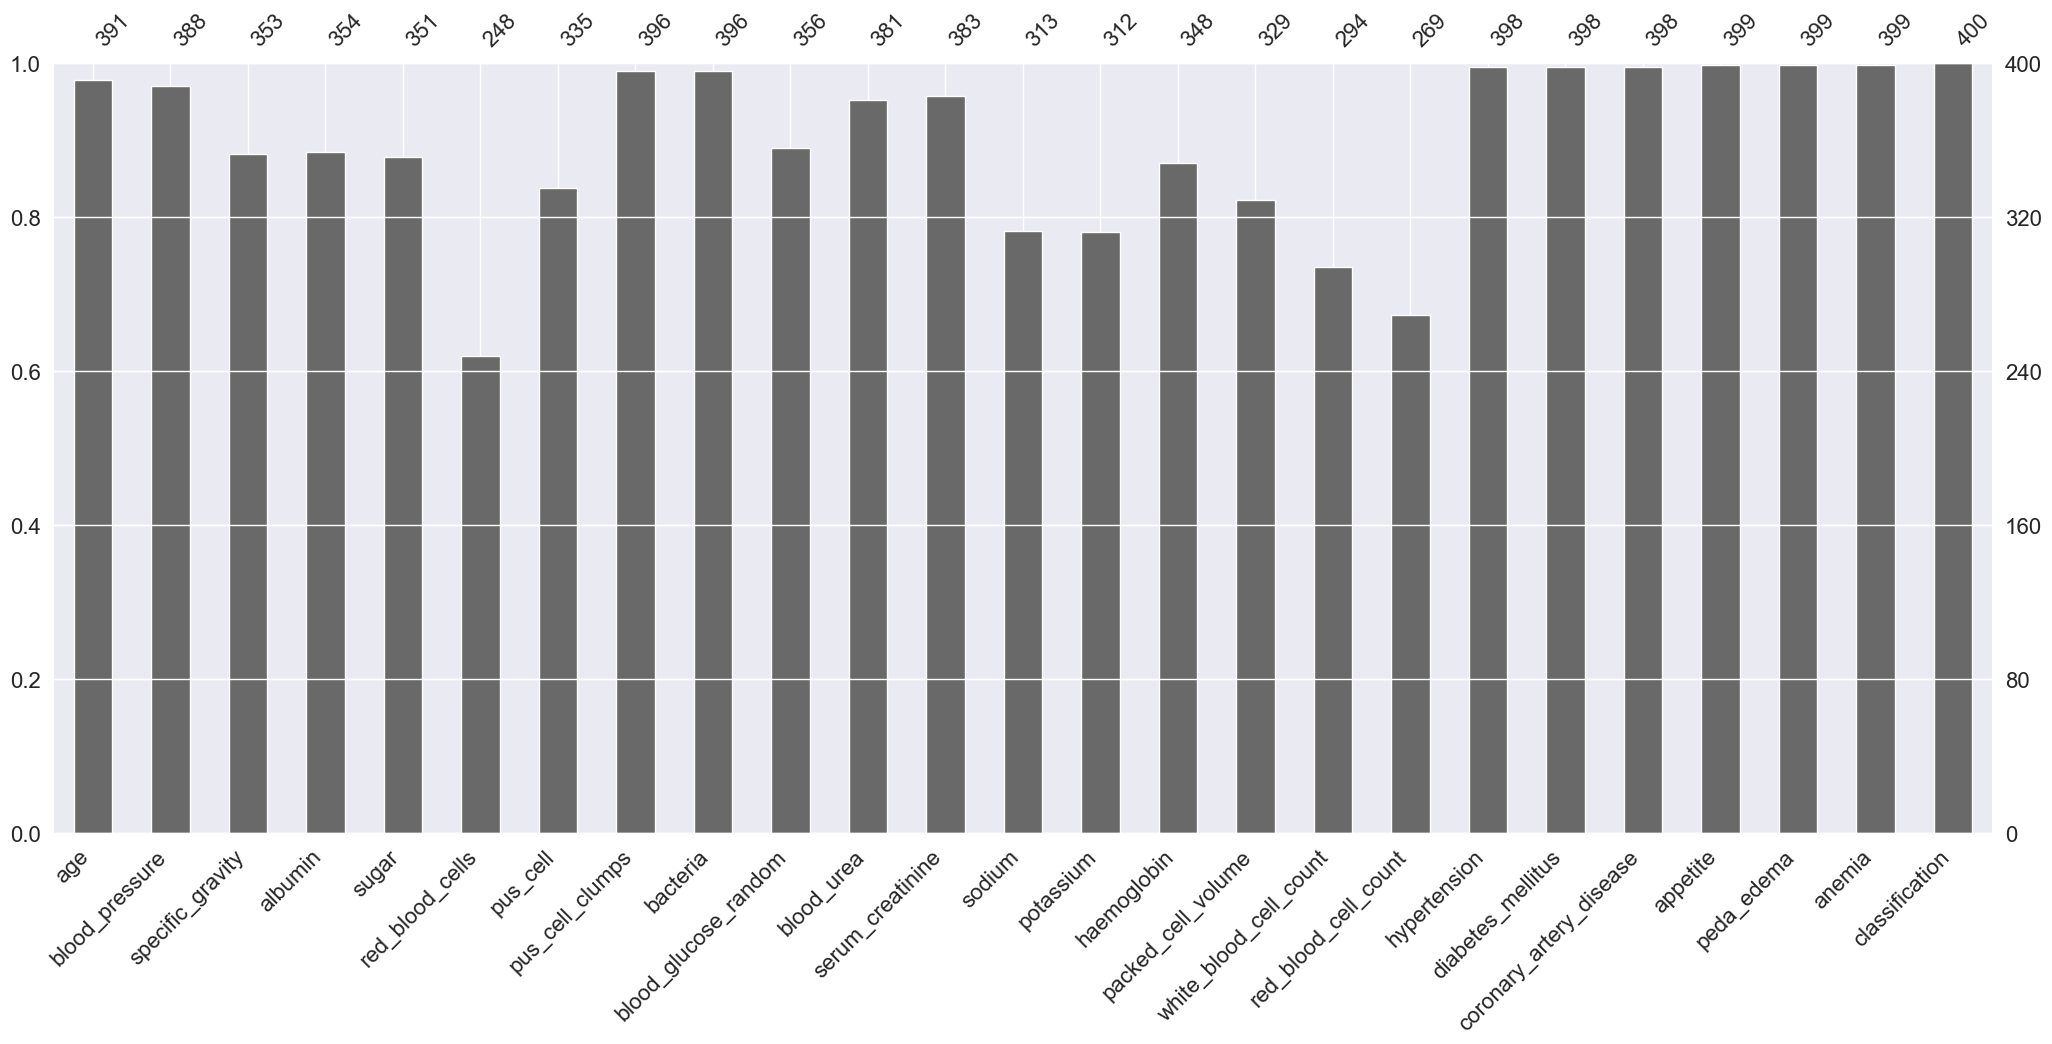

In [5]:
# Labeling categorical features
# (Converting Categorical features into numerical values)

dictionary = {

"red_blood_cells": {
"abnormal":0,
"normal": 1,
},
"pus_cell":{
"abnormal":0,
"normal": 1,
},
"pus_cell_clumps":{
"present":0,
"notpresent":1,
},
"bacteria":{
"notpresent":1,
"present": 0,
},
"hypertension":{
"yes":0,
"no": 1,
},
"diabetes_mellitus":{
"yes":0,
"no":1,
},
"coronary_artery_disease":{
"yes":0,
"no": 1,
},
"appetite":{
"good":1,
"poor": 0,
},
"peda_edema":{
"yes":0,
"no":1,
},
"anemia":{
"yes":0,
"no":1,
},
"classification":{
"ckd":0,
"nockd":1,
}
}
# Replacing the corresponding labels
kidney_data=kidney_data.replace(dictionary)

# Visualizing the data to check changes made
kidney_data.head()

# Defining functions to create plot for better data distribution visualization

def violin(col):
    fig = px.violin(kidney_data , y=col , x="classification", color="classification", box=True ,
    template = 'seaborn')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(kidney_data , hue="classification", height = 6, aspect=2)
    grid.map(sns.kdeplot , col)
    grid.add_legend()

def scatter(col1 , col2):
    fig = px.scatter(kidney_data , x=col1 , y=col2 , color="classification", template = 'plotly_dark')
    return fig.show()
# Violin and scatter plots
violin('age')
scatter('haemoglobin', 'packed_cell_volume')
scatter('haemoglobin','age')


# Checking for missing values
kidney_data.isnull().sum()

# visual missing value plot
msno.bar(kidney_data)
plt.show()

# Missing value handling using SimpleImputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
kidney_data_imputed = pd.DataFrame(imputer.fit_transform(kidney_data), \
    columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
'potassium', 'haemoglobin', 'packed_cell_volume',
'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
'peda_edema', 'anemia','classification'])

# Making sure all the missing values are handled
kidney_data_imputed.isnull().sum()

# Assigning x for independent variables and y for target variable
X = kidney_data_imputed.iloc[:,0:24]
y = kidney_data_imputed.iloc[:,-1]

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87        47
         1.0       0.78      0.88      0.83        33

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.86      0.85      0.85        80

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95        47
         1.0       0.89      0.97      0.93        33

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        47
         1.0       0.94      1.00      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

              preci

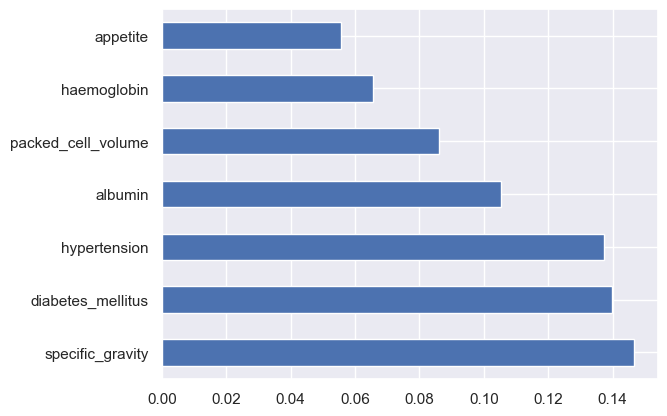

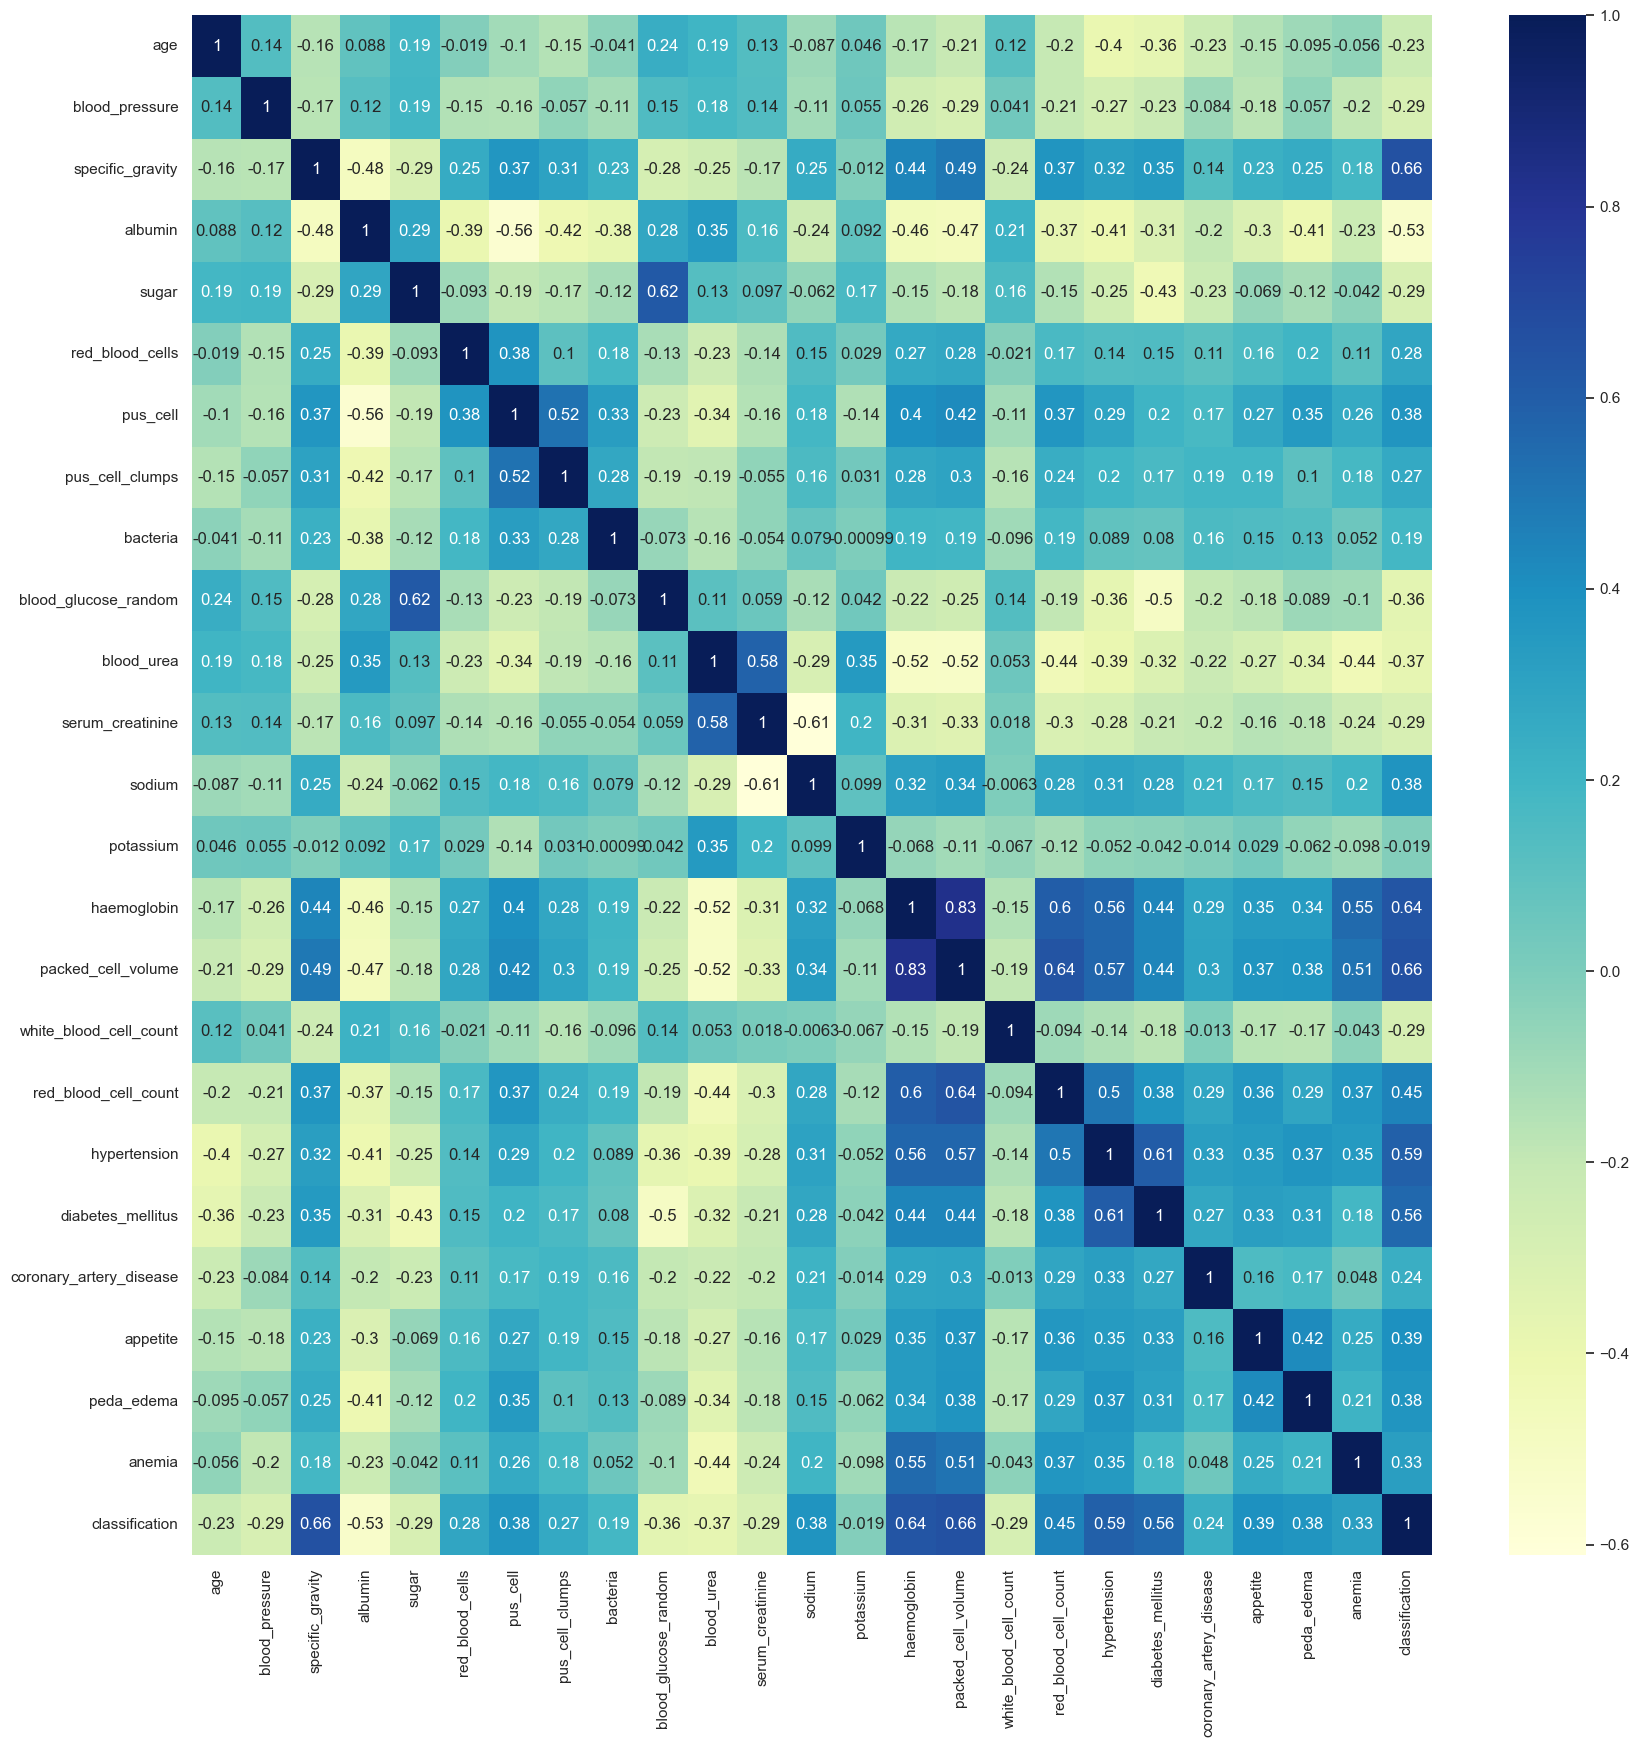

                   Features         Score
16   white_blood_cell_count  25847.635652
10               blood_urea   2341.230273
9      blood_glucose_random   2092.920330
11         serum_creatinine    357.989486
15       packed_cell_volume    293.863135
3                   albumin    216.000000
0                       age    119.305673
14              haemoglobin    101.643844
4                     sugar     94.800000
1            blood_pressure     81.786701
18             hypertension     51.246640
19        diabetes_mellitus     42.819011
12                   sodium     35.921536
21                 appetite     12.686792
17     red_blood_cell_count     12.418153
6                  pus_cell     10.696296
22               peda_edema     10.696296
23                   anemia      6.352941
5           red_blood_cells      3.754674
7           pus_cell_clumps      2.956425
20  coronary_artery_disease      1.895082
8                  bacteria      0.768254
13                potassium      0

In [7]:
# Importing all the ML models considered for this project
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Spliting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train ,y_test = \
train_test_split(X,y,test_size=0.2, random_state =1)

# Train and Testing using Logistic Regression using the original dataset
model = LogisticRegression(verbose=0,random_state=None)
model.fit(X_train , y_train)
y_predict = model.predict(X_test)

# Performance Evaluation (Accuracy , precision , recall , f1-score and support for LR using original data
print(classification_report(y_true=y_test , y_pred=y_predict))

# Train and Testing using Support Vector Machine
model = svm.SVC(kernel='linear') # Linear Kernel
model.fit(X_train , y_train)
y_predict = model.predict(X_test)

# Performance Evaluation (Accuracy , precision , recall , f1-score and support for SVM using original data
print(classification_report(y_true=y_test , y_pred=y_predict))

# Train and Testing using Decision Tree Classifier
model = DecisionTreeClassifier ()
model = model.fit(X_train , y_train)
y_predict = model.predict(X_test)

# Performance Evaluation (Accuracy , precision , recall , f1-score and support for DT using original data
print(classification_report(y_true=y_test , y_pred=y_predict))

# Train and Testing using Random Forest Classifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train , y_train)

y_predict = model.predict(X_test)

# Performance Evaluation (Accuracy , precision , recall , f1-score and support for RF using original data
print(classification_report(y_true=y_test , y_pred=y_predict))

# Train and Testing using KNN
model = KNeighborsClassifier ()
model.fit(X_train ,y_train)
y_predict = model.predict(X_test)

# Performance Evaluation (Accuracy , precision , recall , f1-score and support for KNN using original data
print(classification_report(y_true=y_test , y_pred=y_predict))

# Feature selection using Feature importance
X = kidney_data_imputed.iloc[:,0:24]
y = kidney_data_imputed.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier ()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_ , index=X.columns)
feat_importances.nlargest (7).plot(kind='barh')
plt.show()

# Feature selection using Correlation matrix with heatmap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

plt.figure(figsize = (20,20))
dataplot = sb.heatmap(kidney_data_imputed.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Feature Selection Using SelectKBest
# apply SelectKBest class to extract top best feature
# print n best features in descending order
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
BestFeatures = SelectKBest(score_func=chi2 , k=15)
fit = BestFeatures.fit(X,y)
kidney_data_scores = pd.DataFrame(fit.scores_)
kidney_data_columns = pd.DataFrame(X.columns)
f_Scores = pd.concat([kidney_data_columns ,kidney_data_scores],axis=1)
f_Scores.columns = ['Features','Score']
print(f_Scores.nlargest(24,'Score'))

# Dropping columns with score less than 10 (seven columns)
X = X.drop(['anemia','red_blood_cells','pus_cell_clumps', 'coronary_artery_disease', \
    'bacteria','potassium','specific_gravity'], axis=1)
X.shape

X_train ,X_test , y_train ,y_test = \
train_test_split(X,y,test_size=0.2, random_state =1)

# Training all the models with features selected by Using SelectKBest
# Train and Testing using Logistic Regression
model = LogisticRegression(verbose=0,random_state=None)
model.fit(X_train , y_train)
y_predict = model.predict(X_test)

# Performance Evaluation (Accuracy , precision , recall , f1-score and support for LR using original data
print(classification_report(y_true=y_test , y_pred=y_predict))

# Train and Testing using Support Vector Machine
model = svm.SVC(kernel='linear') # Linear Kernel
model.fit(X_train , y_train)
y_predict = model.predict(X_test)

# Performance Evaluation (Accuracy , precision , recall , f1-score and support for SVM using original data
print(classification_report(y_true=y_test , y_pred=y_predict))

# Train and Testing using Decision Tree Classifier
model = DecisionTreeClassifier ()
model = model.fit(X_train , y_train)
y_predict = model.predict(X_test)

# Performance Evaluation (Accuracy , precision , recall , f1-score and support for DT using original data
print(classification_report(y_true=y_test , y_pred=y_predict))

# Train and Testing using Random Forest Classifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train , y_train)
y_predict = model.predict(X_test)

# Performance Evaluation (Accuracy , precision , recall , f1-score and support for RF using original data
print(classification_report(y_true=y_test , y_pred=y_predict))

# Train and Testing using KNN
model = KNeighborsClassifier ()
model.fit(X_train ,y_train)
y_predict = model.predict(X_test)

# Performance Evaluation (Accuracy , precision , recall , f1-score and support for KNN using original data
print(classification_report(y_true=y_test , y_pred=y_predict))


In [8]:
# Balancing the dataset
import collections
from knnor import data_augment
print("Original shape=",X.shape ,y.shape)
elements_count = collections.Counter(y)
# printing the element and the frequency
print("Original distribution:")
for key , value in elements_count.items():
    print(f"{key}: {value}")
    
X = X.to_numpy()
y = y.to_numpy()
print(X)
print(y)

Original shape= (400, 17) (400,)
Original distribution:
0.0: 250
1.0: 150
[[48. 80.  1. ...  0.  1.  1.]
 [ 7. 50.  4. ...  1.  1.  1.]
 [62. 80.  2. ...  0.  0.  1.]
 ...
 [12. 80.  0. ...  1.  1.  1.]
 [17. 60.  0. ...  1.  1.  1.]
 [58. 80.  0. ...  1.  1.  1.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

In [9]:
# Apply resamoling technique
knnor = data_augment.KNNOR()
X_new , y_new , X_aug_min , y_aug_min = knnor.fit_resample(X,y)
y_new = y_new.reshape(-1,1)
new_data = np.append(X_new , y_new , axis=1)

X_new , y_new , X_aug_min , y_aug_min = knnor.fit_resample(X, y,)
print("Shape after augmentation",X_new.shape ,y_new.shape)
elements_count = collections.Counter(y_new)
print("Final distribution:")
for key , value in elements_count.items():
    print(f"{key}: {value}")

y_new = y_new.reshape(-1,1)
new_data = np.append(X_new , y_new , axis=1)
data_col = kidney_data.columns
new_data_col = data_col.drop(['anemia','red_blood_cells','pus_cell_clumps', 'coronary_artery_disease', \
    'bacteria','potassium','specific_gravity'])

#new_data = pd.DataFrame(new_data, columns=new_data_col)
print(new_data_col)

Shape after augmentation (500, 17) (500,)
Final distribution:
0.0: 250
1.0: 250
Index(['age', 'blood_pressure', 'albumin', 'sugar', 'pus_cell',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite',
       'peda_edema', 'classification'],
      dtype='object')


In [11]:
# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(new_data, columns=new_data_col)

# Specify the output CSV file name
output_file = 'data/output_data.csv'

# Export the DataFrame to a CSV file
df.to_csv(output_file, index=False, header=True)  # Set header=True if you want to include column names

print(f'Data exported to {output_file}')


Data exported to data/output_data.csv


In [15]:
# Load the original data
data = pd.read_csv('data/output_data.csv')  # Replace with your actual CSV file path

# Check the original shape
print(f'Original data shape: {data.shape}')

# Set the desired number of rows
desired_rows = 5000

# Augment the data by sampling with replacement
augmented_data = data.sample(n=desired_rows, replace=True, random_state=42)

# Optionally, add noise to numerical columns to introduce variability
for column in augmented_data.select_dtypes(include=[np.number]).columns:
    noise = np.random.normal(0, 0.01, size=augmented_data[column].shape)  # Adjust the scale of noise as needed
    augmented_data[column] += noise

# Check the augmented data shape
print(f'Augmented data shape: {augmented_data.shape}')

# Save the augmented data to a new CSV file
augmented_data.to_csv('data/augmented_data.csv', index=False)

print('Augmented data saved to augmented_data.csv')


Original data shape: (500, 18)
Augmented data shape: (5000, 18)
Augmented data saved to augmented_data.csv
